# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfTrain = pd.read_csv('titanic_train.csv')
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## EDA

In [4]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
listItem = []
for col in dfTrain.columns:
    listItem.append([col, dfTrain[col].dtype, dfTrain[col].isna().sum(),
                    round((dfTrain[col].isna().sum()/len(dfTrain[col])) * 100,2),
                    dfTrain[col].nunique(), list(dfTrain[col].unique()[:2])]);
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null',
                              'nullPct', 'unique', 'uniqueSample'],
                     data = listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,PassengerId,int64,0,0.00,891,"[1, 2]"
1,Survived,int64,0,0.00,2,"[0, 1]"
2,Pclass,int64,0,0.00,3,"[3, 1]"
3,Name,object,0,0.00,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.00,2,"[male, female]"
5,Age,float64,177,19.87,88,"[22.0, 38.0]"
6,SibSp,int64,0,0.00,7,"[1, 0]"
7,Parch,int64,0,0.00,7,"[0, 1]"
8,Ticket,object,0,0.00,681,"[A/5 21171, PC 17599]"
9,Fare,float64,0,0.00,248,"[7.25, 71.2833]"


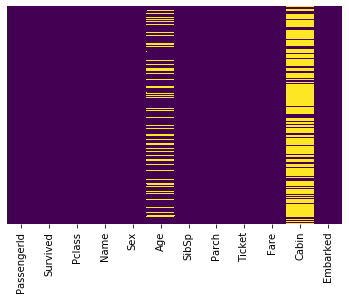

In [6]:
sns.heatmap(dfTrain.isnull(), yticklabels=False, cbar=False, cmap='viridis')

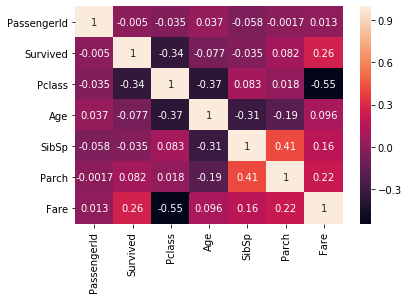

In [7]:
sns.heatmap(dfTrain.corr(), annot=True)

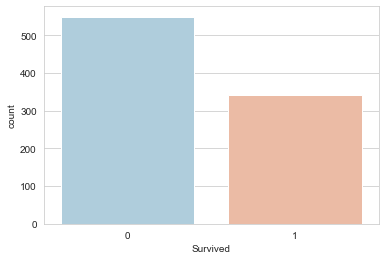

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=dfTrain, palette='RdBu_r')

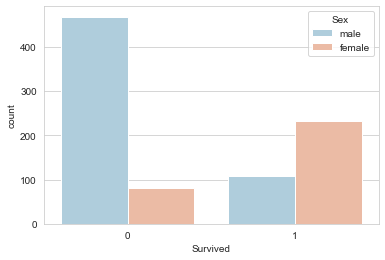

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=dfTrain, palette='RdBu_r')

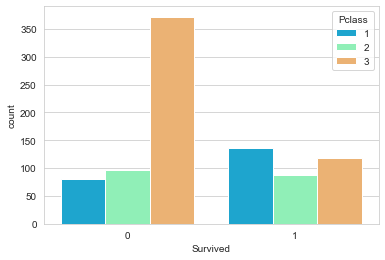

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=dfTrain, palette='rainbow')

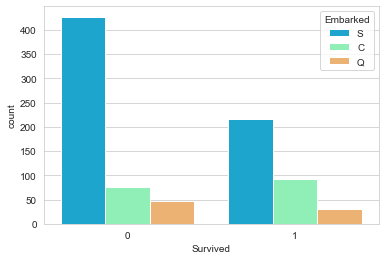

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Embarked', data=dfTrain, palette='rainbow')

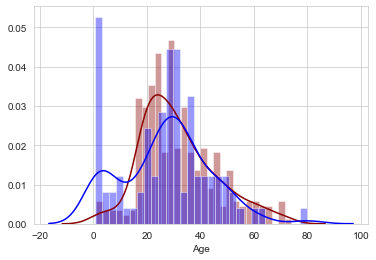

In [12]:
sns.distplot(dfTrain[(dfTrain['Survived']==0) & (dfTrain['Sex']=='male')]['Age'].dropna(), kde=True, color='darkred', bins=30)
sns.distplot(dfTrain[(dfTrain['Survived']==1) & (dfTrain['Sex']=='male')]['Age'].dropna(), kde=True, color='blue', bins=30)

#berarti bayi selamat, pola nya udah split tu si age

In [13]:
dfTrain[dfTrain['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


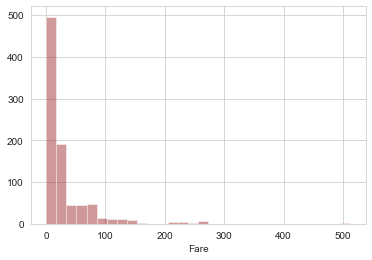

In [14]:
sns.distplot(dfTrain['Fare'].dropna(), kde=False, color='darkred', bins=30)

In [15]:
dfTrain[dfTrain['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [16]:
dfTrain[dfTrain['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


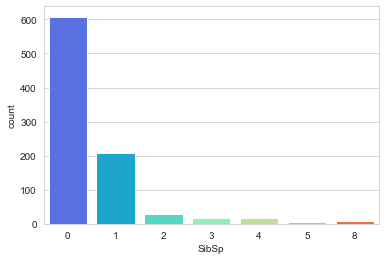

In [17]:
sns.countplot(x='SibSp', data=dfTrain, palette='rainbow')

In [18]:
dfTrain[dfTrain['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
dfTrain[dfTrain['SibSp']==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [20]:
dfTrain[dfTrain['Name'].str.contains('Rose')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


# Dealing with Missing Data

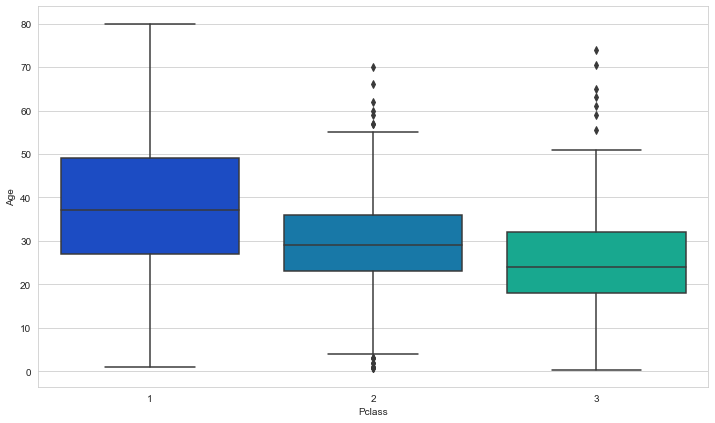

In [21]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=dfTrain, palette='winter')

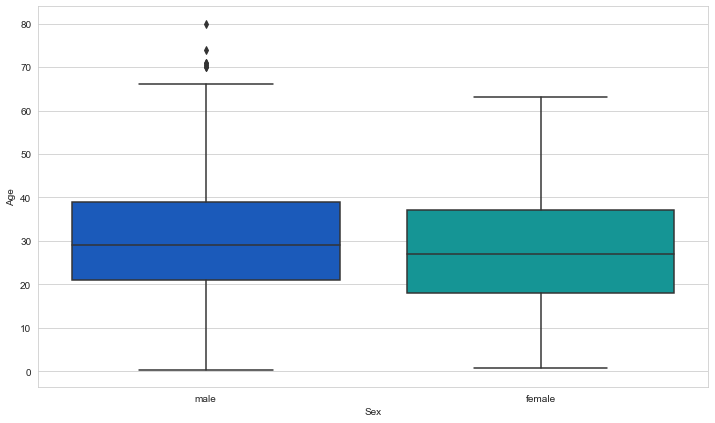

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Sex', y='Age', data=dfTrain, palette='winter')

In [23]:
dfTrain.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [24]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [25]:
dfTrain['Age'] = dfTrain[['Age', 'Pclass']].apply(impute_age,axis=1)

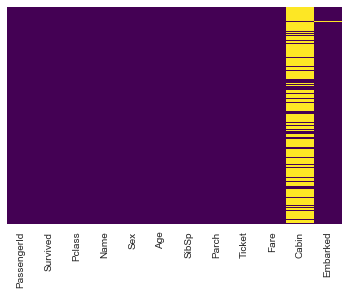

In [26]:
sns.heatmap(dfTrain.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [27]:
dfTrain.drop('Cabin', axis=1, inplace=True)

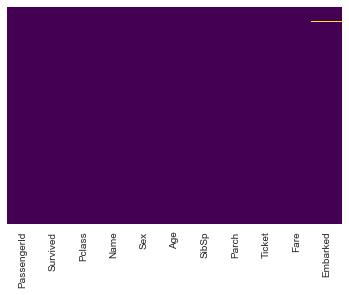

In [28]:
sns.heatmap(dfTrain.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
dfTrain.dropna(inplace=True)

In [30]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# One Hot Encoding

In [31]:
sex = pd.get_dummies(dfTrain['Sex'], drop_first=True)
embark = pd.get_dummies(dfTrain['Embarked'], drop_first=True)

In [32]:
dfTrain.drop (['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [33]:
dfTrain = pd.concat([dfTrain, sex, embark], axis=1)

In [34]:
dfTrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split (dfTrain.drop('Survived', axis=1),
                                                     dfTrain['Survived'], test_size=.3,
                                                     random_state=101)

In [37]:
dfTrain['Survived'].value_counts()/889

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [38]:
y_train.value_counts()/(386+236)

0    0.620579
1    0.379421
Name: Survived, dtype: float64

In [39]:
y_test.value_counts()/(163+104)

0    0.610487
1    0.389513
Name: Survived, dtype: float64

# Train The Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=100, random_state=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

# Feature Importances

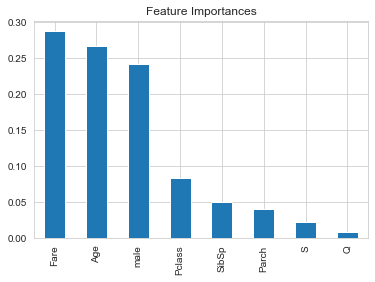

In [42]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

# Evaluate Model

### Training Error

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score

In [44]:
predictTrain = rfc.predict(X_train)
predictTrain

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [45]:
len(predictTrain)

622

In [46]:
sum(predictTrain)

234

In [47]:
con = pd.DataFrame(data=confusion_matrix(y_train, predictTrain), columns=['P No', 'P Yes'],
                  index = ['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    383      3
A Yes     5    231


In [48]:
print('Precision No: ', (383/(383+5)))
print('Precision Yes: ', (231/(231+3)))
print('Recall No: ', (383/(383+3)))
print('Recall Yes: ', (231/(231+5)))


Precision No:  0.9871134020618557
Precision Yes:  0.9871794871794872
Recall No:  0.9922279792746114
Recall Yes:  0.9788135593220338


In [49]:
print(classification_report(y_train, predictTrain))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       386
           1       0.99      0.98      0.98       236

    accuracy                           0.99       622
   macro avg       0.99      0.99      0.99       622
weighted avg       0.99      0.99      0.99       622



In [50]:
print('Accuracy: '+ str((383+231)/622))

Accuracy: 0.9871382636655949


In [51]:
print('Accuracy: '+ str(accuracy_score(y_train,predictTrain)))

Accuracy: 0.9871382636655949


In [52]:
predictProbTrain = rfc.predict_proba(X_train)
predictProbTrain

array([[0.72 , 0.28 ],
       [0.058, 0.942],
       [0.13 , 0.87 ],
       ...,
       [0.39 , 0.61 ],
       [0.99 , 0.01 ],
       [0.05 , 0.95 ]])

In [53]:
listPredict = []
for item in predictProbTrain:
    if item[1] > 0.2 :
        listPredict.append(1)
    else:
        listPredict.append(0)
listPredict

[1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,


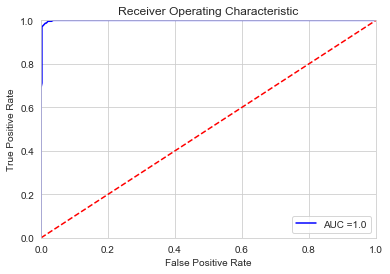

In [54]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr,tpr,threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
print(fpr[-5:])
print(tpr[-5:])
print(threshold[-5:])

[0.62435233 0.72279793 0.7253886  0.74611399 1.        ]
[1. 1. 1. 1. 1.]
[0.0125 0.01   0.005  0.0025 0.    ]


In [56]:
log_loss(y_train, predictProbTrain[:,1])

0.1177920860210075

### Testing Error

In [57]:
predictTest = rfc.predict(X_test)
predictTest

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [58]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'],
                  index = ['A No', 'A Yes']);
print(con)

       P No  P Yes
A No    141     22
A Yes    28     76


In [59]:
print(classification_report(y_test, predictTest))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       163
           1       0.78      0.73      0.75       104

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [60]:
print('Accuracy: '+ str(accuracy_score(y_test,predictTest)))

Accuracy: 0.8127340823970037


In [61]:
predictProbTest = rfc.predict_proba(X_test)
predictProbTest

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.11      , 0.89      ],
       [0.        , 1.        ],
       [0.91      , 0.09      ],
       [0.89      , 0.11      ],
       [0.14      , 0.86      ],
       [0.65690476, 0.34309524],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [0.005     , 0.995     ],
       [0.04      , 0.96      ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.7       , 0.3       ],
       [0.97      , 0.03      ],
       [0.        , 1.        ],
       [0.02      , 0.98      ],
       [0.201     , 0.799     ],
       [0.73      , 0.27      ],
       [0.63      , 0.37      ],
       [0.946     , 0.054     ],
       [0.92      , 0.08      ],
       [0.86      , 0.14      ],
       [0.96      , 0.04      ],
       [0.58      , 0.42      ],
       [0.38      , 0.62      ],
       [0.4       , 0.6       ],
       [0.54      , 0.46      ],
       [1.        , 0.        ],
       [0.

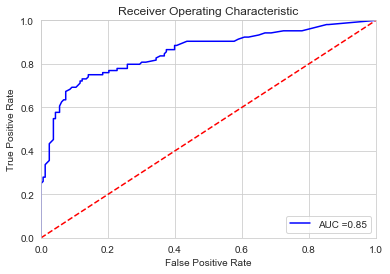

In [62]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr,tpr,threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
log_loss(y_test, predictProbTest[:,1])

0.6972823535004335

# K Fold

In [125]:
def calc_train_error(X_train, y_train, model):
    # return in-sample error for already fit model
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    logloss = log_loss(y_train, predictProba)
    report = classification_report(y_train, predictions)
    return {
        'report': report,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'logloss': logloss
    }

def calc_validation_error(X_test, y_test, model):
    # return out-sample error for already fit model
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    logloss = log_loss(y_test, predictProba)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'logloss': logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    # fits model and returns the in-sample error and out-of-sample error
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [75]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

In [76]:
data = dfTrain.drop('Survived', axis=1)
target = dfTrain['Survived']

In [77]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data,target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    print(len(X_val), (len(X_train) + len(X_val)))
    
    # instantiate model
    rfc = RandomForestClassifier(n_estimators=100, random_state=101)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, rfc)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

89 889
89 889
89 889
89 889
89 889
89 889
89 889
89 889
89 889
88 889


In [115]:
hasiltrain = pd.DataFrame(data=train_errors)
hasiltest = pd.DataFrame (data= validation_errors)

In [121]:
hasiltrain = hasiltrain.rename(columns={"accuracy": "Train Accuracy", "f1": "Train F1", "logloss": "Train LogLoss", "roc": "Train ROC AUC"})
hasiltest = hasiltest.rename(columns={"accuracy": "Test Accuracy", "f1": "Test F1", "logloss": "Test LogLoss", "roc": "Test ROC AUC"})

In [124]:
dfhasil = pd.concat([hasiltrain.drop('report', axis=1),hasiltest.drop('report', axis=1)], axis=1)
dfhasil.loc['average'] = dfhasil.mean()
dfhasil

,Train Accuracy,Train F1,Train LogLoss,Train ROC AUC,Test Accuracy,Test F1,Test LogLoss,Test ROC AUC
0,0.980000,0.978831,0.122381,0.997367,0.786517,0.772623,0.444902,0.880423
1,0.985000,0.983979,0.112724,0.997254,0.752809,0.747420,0.593095,0.830753
2,0.982500,0.981500,0.117681,0.998066,0.752809,0.713407,0.836331,0.835095
3,0.980000,0.978580,0.122562,0.996758,0.808989,0.808602,0.816702,0.863728
4,0.981250,0.979905,0.125353,0.997081,0.842697,0.841071,0.670300,0.937307
5,0.982500,0.981500,0.120936,0.997693,0.842697,0.824011,1.504824,0.838418
6,0.983750,0.982724,0.121258,0.997423,0.887640,0.879600,1.138229,0.866931
7,0.983750,0.982768,0.124368,0.996742,0.842697,0.826752,0.379758,0.898128
8,0.980000,0.978883,0.126710,0.996930,0.786517,0.763066,0.426474,0.865632
9,0.981273,0.980106,0.121847,0.997310,0.784091,0.761654,0.499832,0.837190


In [127]:
import numpy as np
listItem =[]

for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'], 
                     tr['logloss'], val['logloss']])
listItem.append(list(np.mean(listItem, axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                 'Train ROC AUC',
                                  'Test ROC AUC',
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Log Loss',
                                 'Test Log Loss'])
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,0.980000,0.786517,0.997367,0.880423,0.978831,0.772623,0.122381,0.444902
1,0.985000,0.752809,0.997254,0.830753,0.983979,0.747420,0.112724,0.593095
2,0.982500,0.752809,0.998066,0.835095,0.981500,0.713407,0.117681,0.836331
3,0.980000,0.808989,0.996758,0.863728,0.978580,0.808602,0.122562,0.816702
4,0.981250,0.842697,0.997081,0.937307,0.979905,0.841071,0.125353,0.670300
5,0.982500,0.842697,0.997693,0.838418,0.981500,0.824011,0.120936,1.504824
6,0.983750,0.887640,0.997423,0.866931,0.982724,0.879600,0.121258,1.138229
7,0.983750,0.842697,0.996742,0.898128,0.982768,0.826752,0.124368,0.379758
8,0.980000,0.786517,0.996930,0.865632,0.978883,0.763066,0.126710,0.426474
9,0.981273,0.784091,0.997310,0.837190,0.980106,0.761654,0.121847,0.499832


NameError: name 'X_train' is not defined